# Introducción
## Construyamos una neurona

El objetivo de este Colab es el de poder definir una neurona usando las funcionalidades básicas de Python.

Sólo usaremos el paquete numpy para poder trabajar con expresiones matemáticas con facilidad y el paquete matplotlib para graficar.

Nuestro primer objetivo es definir las funciones de activación más usuales:

1) Unidad de rectificación lineal (Rectified Linear Unit - ReLU)
$$ ReLU(x) = \begin{cases}
0 & \text{ si } x\le 0\\
x & \text{ si } x>0;
\end{cases}$$

2) Función "Softplus". Esta función es una regularización de ReLU.
$$
sp(x) = \ln(1+e^{x}).
$$

3) Función de Heaviside o función de salto
$$
H(x) = \begin{cases}
0 & \text{ si } x\le 0\\
1 & \text{ si } x>0;
\end{cases}
$$

4) Función sigmoide. Esta función es una regularización de la de Heaviside, $H(x)$.
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

In [ ]:
# Definamos las funciones de activación más usuales:

import numpy as np

def ReLU(x):
  """
  Función ReLU (Rectified Linear Unit function).

  Argumentos:
    x: valor de entrada o matriz de numpy.

  Devolución:
    El valor ReLU de x, ReLU(x).
  """
  return np.maximum(0, x)

def Softplus(x):
  """
  Función Softplus.

  Argumentos:
    x: valor de entrada o matriz de numpy.

  Devolución:
    El valor Softplus de x, sp(x).
  """
  return np.log(1 + np.exp(x))

def Sigmoid(x):
  """
  Función Sigmoide.

  Argumentos:
    x: valor de entrada o matriz de numpy.

  Devolución:
    El valor de Sigmoid of x, $\sigma(x)$.
  """
  return 1 / (1 + np.exp(-x))

def Heaviside(x):
  """
  La función de salto Heaviside.

  Argumentos:
    x: valor de entrada o matriz de numpy.

  Devolución:
    El valor de H(x).
  """
  return x>0 #Python interpreta como 1 si es verdadero y 0 si es falso.


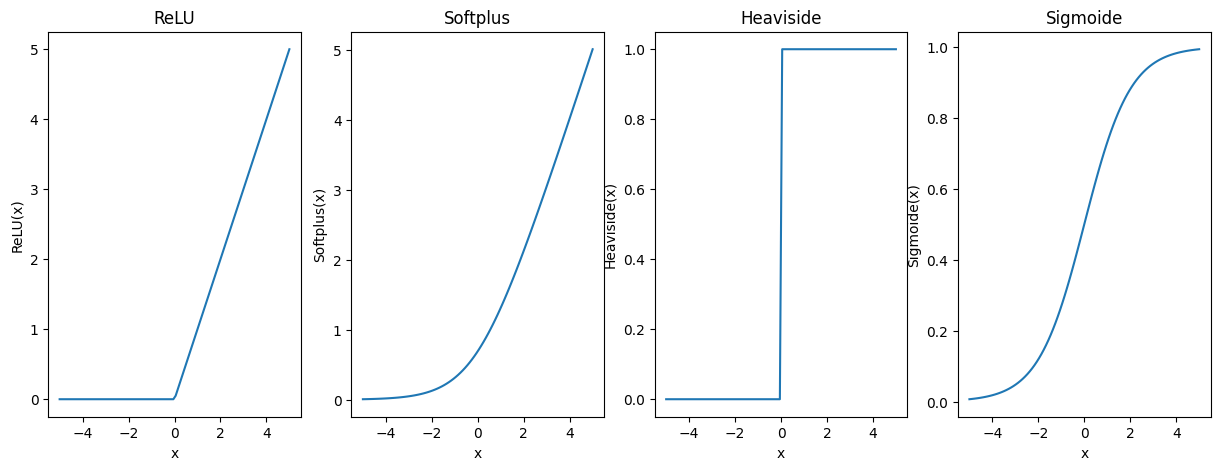

In [ ]:
# Grafiquemos las funciones de activación

import matplotlib.pyplot as plt

# Rango de valores para x
x = np.linspace(-5, 5, 100)

# Calcular los valores de y para cada función
y_relu = ReLU(x)
y_softplus = Softplus(x)
y_heaviside = Heaviside(x)


# Crear la figura y los subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Graficar ReLU
axes[0].plot(x, y_relu)
axes[0].set_title('ReLU')
axes[0].set_xlabel('x')
axes[0].set_ylabel('ReLU(x)')
#axes[0].grid(True)


# Graficar Softplus
axes[1].plot(x, y_softplus)
axes[1].set_title('Softplus')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Softplus(x)')
#axes[1].grid(True)

# Graficar Heaviside
axes[2].plot(x, y_heaviside)
axes[2].set_title('Heaviside')
axes[2].set_xlabel('x')
axes[2].set_ylabel('Heaviside(x)')
#axes[2].grid(True)

# Graficar Sigmoide
axes[3].plot(x, Sigmoid(x))
axes[3].set_title('Sigmoide')
axes[3].set_xlabel('x')
axes[3].set_ylabel('Sigmoide(x)')
#axes[3].grid(True)

# Mostrar la figura
plt.show()


Para ilustrar que $\sigma(x)$ es una regularización de $H(x)$ y que $sp(x)$ es una regularización de $ReLU(x)$ grafiquemos esas funciones juntas.

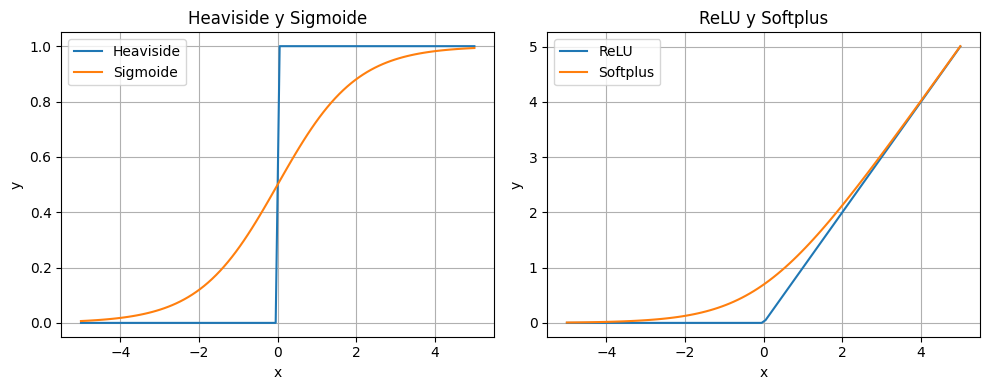

In [ ]:
# Rango de valores para x
x = np.linspace(-5, 5, 100)

# Calcular los valores de y para cada función
y_heaviside = [Heaviside(val) for val in x]
y_sigmoid = Sigmoid(x)
y_relu = ReLU(x)
y_softplus = Softplus(x)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Primer subplot: Heaviside y Sigmoide
axes[0].plot(x, y_heaviside, label='Heaviside')
axes[0].plot(x, y_sigmoid, label='Sigmoide')
axes[0].set_title('Heaviside y Sigmoide')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()
axes[0].grid(True)

# Segundo subplot: ReLU y Softplus
axes[1].plot(x, y_relu, label='ReLU')
axes[1].plot(x, y_softplus, label='Softplus')
axes[1].set_title('ReLU y Softplus')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()
axes[1].grid(True)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()


Para definir ahora una neurona, necesitamos tener la dimensión de los datos de entrada $n$, un vector de pesos $\mathbf w = (w_1,\dots,w_n)\in \mathbb R^n$ y un sesgo $b\in\mathbb R$.

Dados ciertos datos de entrada $\mathbf x = (x_1,\dots,x_n)\in \mathbb R^n$, lo primero que hay que calcular es la cantidad
$$
\mathbf w \cdot \mathbf x + b = \sum_{i=1}^n w_i x_i + b.
$$
Luego se elije una función de activación $\varphi$ y la salida de la neurona es la aplicación de esta función de activación en la cantidad definida arriba, i.e.
$$
\varphi(\mathbf w \cdot \mathbf x + b) = \varphi\left(\sum_{i=1}^n w_i x_i + b\right).
$$

Definamos ahora una neurona asociada a cada función de activación.

In [ ]:
# prompt: funciones aplicando las funciones de activación como explique en la celda de texto

def neurona_ReLU(x, w, b):
  """
  Neurona con función de activación ReLU.

  Args:
    x: Vector de entrada (numpy array).
    w: Vector de pesos (numpy array).
    b: Sesgo (float).

  Returns:
    La salida de la neurona.
  """
  return ReLU(np.dot(w, x) + b)

def neurona_Softplus(x, w, b):
  """
  Neurona con función de activación Softplus.

  Args:
    x: Vector de entrada (numpy array).
    w: Vector de pesos (numpy array).
    b: Sesgo (float).

  Returns:
    La salida de la neurona.
  """
  return Softplus(np.dot(w, x) + b)

def neurona_Sigmoid(x, w, b):
  """
  Neurona con función de activación Sigmoid.

  Args:
    x: Vector de entrada (numpy array).
    w: Vector de pesos (numpy array).
    b: Sesgo (float).

  Returns:
    La salida de la neurona.
  """
  return Sigmoid(np.dot(w, x) + b)

def neurona_Heaviside(x, w, b):
  """
  Neurona con función de activación Heaviside.

  Args:
    x: Vector de entrada (numpy array).
    w: Vector de pesos (numpy array).
    b: Sesgo (float).

  Returns:
    La salida de la neurona.
  """
  return Heaviside(np.dot(w, x) + b)


Probemos ahora definir un conjunto de pesos y sesgo para evaluar la neurona

In [ ]:
# definimos el vector de pesos y el sesgo
w = np.array([0.5, -0.2, 1, 6])
b = 8

# elegimos el vector de datos a evaluar
x = np.array([1, 1, -1, 0])

# evaluamos la neurona sigmoide usando los pesos, sesgo y datos definidos
output = neurona_Sigmoid(x, w, b)
print(f"Salida de la neurona sigmoide: {output}")


Salida de la neurona sigmoide: 0.9993249172693672
